<a href="https://colab.research.google.com/github/elsa9421/Optimal-separating-Hyperplanes/blob/master/OSH_Hard_Margin_SVM_Demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def valid_hyperplane(X,y,w,b):
  '''
  Checking if it is a valid hyperplane that separates the two classes
  i.e check yi(wT xi + b) > 0 ∀i = 1, . . . , n.

  Input:
  -X: data points, shape(N,2)
  -y: class labels= {-1,1}, shape(N,)
  -w: weights, shape(2,)
  -b: bias 

  '''

  output=np.zeros((len(y),))
  wT_x=np.dot(w.T,X.T).T +b       # (N,1)
  output=np.multiply(y,wT_x)      #(N,1)

  
  if all(i >0 for i in output) or all(i <0 for i in output):
    return True
  else:
    #valid_hyperplane(X,y,w,b)
    return False
    #return w,False

def find_vectors2(X,y,w,b):
  
  '''
  Find and return closest data points to decision boundary for input X,y,w,b
  decision_boundary = -w0/w1 * x_vec - bias/w1

  |r| =|wT z + b|/||w||

  '''


  dist=np.zeros((len(X),))
  dist=np.divide(abs(np.dot(w.T,X.T).T+b),np.linalg.norm(w))
  sv=[]
  dist_sort=np.argsort(dist)
  sv.append(X[dist_sort[0]])


  k=1
  while(isclose(dist[dist_sort[k-1]], dist[dist_sort[k]], abs_tol=10**-2) ):
    sv.append(X[dist_sort[k]])
    k=k+1
    if k>=len(dist):
      break

  sv=np.array(sv)
  closest=sv[0]
  

  
  return closest,sv
  

# def find_vectors(X,y,w,b):
#   '''
#   Find and return closest data points to decision boundary for input X,y,w,b
#   decision_boundary = -w0/w1 * x_vec - bias/w1

#   |r| =|wT z + b|/||w||

#   '''

#   x_class0=X[y==-1]
#   x_class1=X[y==1]
#   # to find nearest points for each class
#   dist0=np.zeros((len(x_class0),))
#   dist0=np.divide(abs(np.dot(w.T,x_class0.T).T+b),np.linalg.norm(w)) #(N/2,)
#   #Indices0=[]
#   #Indices0.append(x_class0[np.argmin(dist0)])  
#   sv0=[]
#   #sv.append(x_class0[np.argmin(dist0)])
#   dist0_sort=np.argsort(dist0)
#   sv0.append(x_class0[dist0_sort[0]])


#   k=1
#   while(isclose(dist0[dist0_sort[k-1]], dist0[dist0_sort[k]], abs_tol=10**-1) ):
#     sv0.append(x_class0[dist0_sort[k]])
#     k=k+1
#     if k>=len(dist0):
#       break
 
  
#   dist1=np.zeros((len(x_class1),))
#   dist1=np.divide(abs(np.dot(w.T,x_class1.T).T+b),np.linalg.norm(w)) #(N/2,)

#   dist1_sort=np.argsort(dist1)
#   sv1=[]
#   sv1.append(x_class1[dist1_sort[0]])


#   k=1
#   while(isclose(dist1[dist1_sort[k-1]], dist1[dist1_sort[k]], abs_tol=10**-1)):
#     sv1.append(x_class1[dist1_sort[k]])
#     k=k+1
#     if k>=len(dist1):
#       break

#   sv0=np.array(sv0)
#   sv1=np.array(sv1)
#   # print("sv0",sv0)
#   # print("sv1",sv1)
#   sv=np.array([sv0,sv1])
  
#   if(dist1[dist1_sort[0]]<dist0[dist0_sort[0]]):
#     closest=sv1[0]
#     s_dist=-dist1[dist1_sort[0]]
#     #s_dist=1
#   else:
#     closest=sv0[0]
#     s_dist=dist0[dist0_sort[0]]
#     #s_dist=0
  
#   #print("Class1 distances",dist1[dist1_sort])

#   #print("Class0 distances",dist0[dist0_sort])
#   print("support vector class 0",sv0)
#   print("support vector class 1",sv1)
#   print("closest",closest)

#   return s_dist,closest,sv


  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from ipywidgets import interact, interactive_output, fixed, interact_manual,interactive
import ipywidgets as widgets
from math import sin,cos,pi,atan,degrees,tan,isclose,radians



# we create 40 separable points

X, y = make_blobs(n_samples=50, centers=2, random_state=6)
X, y = make_blobs(n_samples=60, centers=[(3, 0), (-3,1)], random_state=6, cluster_std=0.65)
y[y==1]=-1
y[y==0]=1

clf = svm.SVC(kernel='linear',C=1)
y_pred=clf.fit(X, y)

# print("y_pred.coef_",y_pred.coef_)

# flag0=0
# flag1=1
# if (y_pred.coef_[0][0]<0):
#   flag0=1
# if (y_pred.coef_[0][1]<0):
#   flag1=1


optimal_w=(np.sum(y_pred.coef_**2))**0.5
optimal_theta=atan(y_pred.coef_[0][1]/y_pred.coef_[0][0])

if optimal_theta<0:
   optimal_theta=(2*pi)+optimal_theta
optimal_theta=degrees(optimal_theta)



In [ ]:

def plot_svc(w_theta,bias=y_pred.intercept_,X=X,y=y,w_mag=optimal_w):

    w_theta_rad=radians(w_theta)
    # print('w_theta (rad)',w_theta)
    w0=w_mag*cos(w_theta_rad)
    w1=w_mag*sin(w_theta_rad)
    
    # print("w0",w0,w1)
    clf = svm.SVC(kernel='linear')
    y_pred=clf.fit(X, y)
    
    #plt.figure(figsize=(5,5))

    # if bias<0:
    #   bias=-bias
    
    w=np.array([w0,w1])
    print("w=",w)
    print("intercept",y_pred.intercept_)
    ####
    print("valid Hard Margin hyperplane?")
    valid=valid_hyperplane(X,y,w,bias)
    print(valid)


    # while (not valid):
    #   w=new_hyperplane(X,y,w_theta_rad,bias)
    #   valid=valid_hyperplane(X,y,w,bias)
    #   break
    
    #end of while 



    if (valid):
      plt.figure(figsize=(7,7))
      plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
      plt.xlim(x_min,x_max)
      plt.ylim(y_min,y_max)
      #ax=plt.gca()
      #x_min, x_max=ax.get_xlim()
      #y_min,y_max=ax.get_ylim()
      #plt.axis('equal')


      x_vec = np.linspace(x_min, x_max, 200)

      print("Valid separating hyperplane")

      # s_dist1,closest,sv=find_vectors(X,y,w,bias)

      # svs0=sv[0]
      # svs1=sv[1]
      closest,svs=find_vectors2(X,y,w,bias)


      #plt.plot(x_vec,-(y_pred.coef_[0][0]/y_pred.coef_[0][1])* x_vec - y_pred.intercept_/y_pred.coef_[0][1],color='black')

      #print("Value of w[0]=Value of w[1]=",w[0],w[1])


      # At the decision boundary, w0*x0 + w1*x1 + b = 0
      # => x1 = -w0/w1 * x0 - b/w1
      slope=-w[0]/w[1]
      decision_boundary = slope * x_vec - bias/w[1]
      intercept_up=closest[1]-(slope*closest[0])
      intercept_down=-closest[0]+(slope*closest[1])
      # print("closest",closest)
      #Distance between two parallel lines
      #s_dist=abs(slope*closest[0]-closest[1]+(-bias/w[1]))/((slope**2+(-1)**2)**0.5)
      # print("s_dist",s_dist)
      # print("s_dist1",s_dist1)
      # print("intercept_up",intercept_up)
      #diff=(intercept_up**2+ (bias/w[1])**2)**0.5
      margin_up=slope * x_vec +intercept_up   # line through support vector
      margin_down=decision_boundary-intercept_up-(bias/w[1]) #works
      
      plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='none', edgecolors='k')
      # plt.scatter(svs0[:, 0], svs0[:, 1], s=180, facecolors='none', edgecolors='k')
      # plt.scatter(svs1[:, 0], svs1[:, 1], s=180, facecolors='none', edgecolors='k')
      plt.plot(x_vec, decision_boundary, "k-", linewidth=2)
      plt.plot(x_vec, margin_up, "k--", linewidth=2)
      plt.plot(x_vec, margin_down, "k--", linewidth=2)
    
    else:
      print("Not a valid separating hyperplane for given value of theta")



  


In [ ]:
w_theta_slider=widgets.FloatSlider(value=optimal_theta,
                                 min=298,
                                 max=400,
                                 step=1,
                                 description='w_theta',
                                 continuous_update=False)

w_theta_text=widgets.FloatText(value=optimal_theta,
                                 min=298,
                                 max=400,
                                 step=1,
                                 description='w_theta',
                                 continuous_update=False)

widgets.link((w_theta_slider, 'value'), (w_theta_text, 'value'))
w_theta_widget=widgets.HBox([w_theta_slider,w_theta_text])

bias_slider=widgets.FloatSlider(value=y_pred.intercept_,
                                 min=-1,
                                 max=1,
                                 step=.1,
                                 description='bias',
                                 continuous_update=False)

bias_text=widgets.FloatText(value=y_pred.intercept_,
                                 min=-1,
                                 max=1,
                                 step=0.1,
                                 description='bias',
                                 continuous_update=False)

widgets.link((bias_slider, 'value'), (bias_text, 'value'))
bias_widget=widgets.HBox([bias_slider,bias_text])


#out=interactive_output(plot_svc,{"w_mag":w_mag_text,"w_theta":w_theta_text,"bias":bias_text})
out=interactive_output(plot_svc,{"w_theta":w_theta_text,"bias":bias_text})


display(w_theta_widget,bias_widget,out)

#125 to 219
#342 to 260
#288 to 360

# support vectors= [[-1.47962775  0.79634014]
#  [ 1.38359258  0.59361349]]
# clf.y_intercept 0.0675739578372504
# clf_coef [[ 0.69502988 -0.0492107 ]]

Output()

## TO CHECK ; 
PLOTTING support vectors using python's inbuilt fn

support vectors= [[-1.47962775  0.79634014]
 [ 1.38359258  0.59361349]]
clf.y_intercept 0.0675739578372504
clf_coef [[ 0.69502988 -0.0492107 ]]


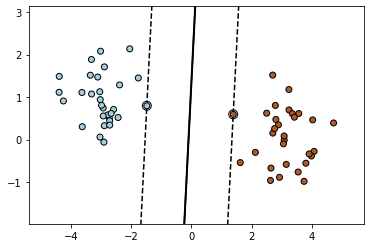

In [ ]:
# support vectors= [[-1.28966764  1.39118446]
#  [ 1.61779152  0.48844174]]
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X, Y = make_blobs(n_samples=60, centers=[(3, 0), (-3,1)], random_state=6, cluster_std=0.65)
Y[Y==1]=-1
Y[Y==0]=1

# figure number
fignum = 1

# fit the model


clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum)
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
print("support vectors=",clf.support_vectors_)
print("clf.y_intercept",clf.intercept_[0])
print("clf_coef",clf.coef_)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

####
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

x_vec = np.linspace(x_min, x_max, 200)
slope=-clf.coef_[0][0]/clf.coef_[0][1]
decision_boundary = slope * x_vec -clf.intercept_/clf.coef_[0][1]

plt.plot(x_vec, decision_boundary, "k-", linewidth=2)
#####
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]


Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum, figsize=(4, 3))
#plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plt.xticks(())
# plt.yticks(())
fignum = fignum + 1

plt.show()